In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [12]:
penduduk = {
    "tinggi_badan": [150, 160, 170, 180, 190],
    "berat_badan": [50, 60, 70, 80, 60],
    'gender':["pria", "wanita", "pria", "wanita", "pria"]
    
}

penduduk_df = pd.DataFrame(penduduk)
penduduk_df

,tinggi_badan,berat_badan,gender
0,150,50,pria
1,160,60,wanita
2,170,70,pria
3,180,80,wanita
4,190,60,pria


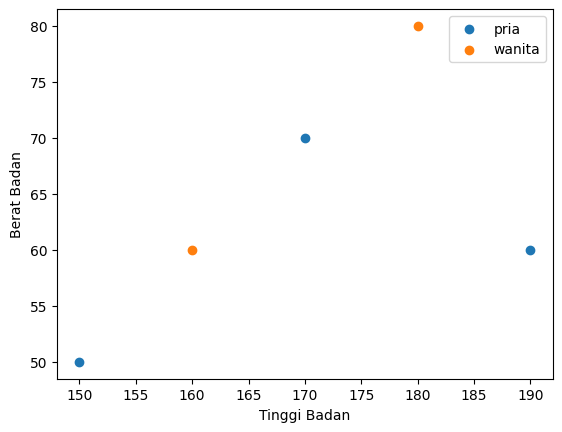

In [13]:
fig, ax = plt.subplots()

for gender, d in penduduk_df.groupby('gender'):
    ax.scatter(d['tinggi_badan'], d['berat_badan'], label=gender)

plt.xlabel("Tinggi Badan")
plt.ylabel("Berat Badan")
plt.legend()
plt.show()

In [14]:
X_train = np.array(penduduk_df[['tinggi_badan', 'berat_badan']])
y_train = np.array(penduduk_df['gender'])

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)


X_train

array([[150,  50],
       [160,  60],
       [170,  70],
       [180,  80],
       [190,  60]], dtype=int64)

# KNN CLASSIFIER

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)

tinggi_baru = 155
berat_baru = 50

X_new = np.array([tinggi_baru, berat_baru]).reshape(1, -1)
y_new = model.predict(X_new)

y_new
# lb.inverse_transform(y_new)



c:\Users\Ulin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0])

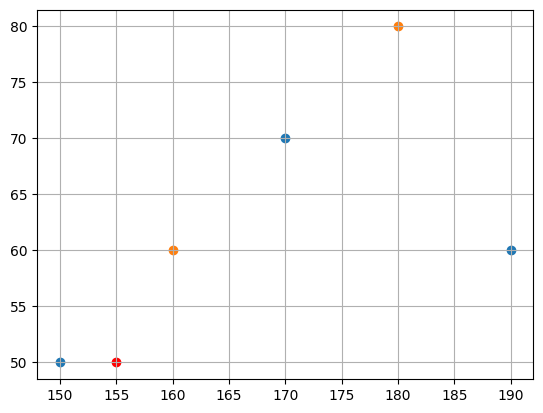

In [16]:
fig, ax = plt.subplots()

for gender, d in penduduk_df.groupby('gender'):
    ax.scatter(d['tinggi_badan'], d['berat_badan'], label=gender)
    
plt.scatter(tinggi_baru, berat_baru, c='r')
plt.grid()


# Euclidean Distance

In [17]:
from scipy.spatial.distance import euclidean

In [18]:
prediksi = np.array([tinggi_baru, berat_baru])


data_jarak = [euclidean(prediksi, i) for i in X_train]

data_jarak.sort()
data_jarak 

[5.0, 11.180339887498949, 25.0, 36.40054944640259, 39.05124837953327]

# Evaluasi


In [19]:
X_test = []
y_test = []

for i in range(len(penduduk['tinggi_badan'])):
    X_test.append([penduduk['tinggi_badan'][i], penduduk['berat_badan'][i]])
    y_test.append(penduduk['gender'][i])

X_test = np.array(X_test)
y_test = np.array(y_test).flatten()
X_test


# model.predict(X_test)

array([[150,  50],
       [160,  60],
       [170,  70],
       [180,  80],
       [190,  60]])